In [2]:
# Install necessary libraries

# Import required libraries
import requests
import json
import matplotlib.pyplot as plt
import folium
from datetime import datetime


In [6]:
# Insert your OpenWeatherMap API key here
api_key = '45b740c5dbad1fc765611648efea13a5'



### Retrieve Current Weather Data for Selected Locations

In this step, we retrieve the current weather data for a predefined set of locations using the OpenWeatherMap API. This process involves making HTTP requests to the API endpoint and parsing the JSON responses to extract relevant weather information.

#### Define Locations and Initialize Data Storage:

We begin by defining a list of locations for which we want to retrieve weather data. These locations include 'New York', 'London', 'Tokyo', and 'Sydney'.

```python
locations = ['New York', 'London', 'Tokyo', 'Sydney']
weather_data = {}


In [7]:
# Define a list of locations for weather data retrieval
locations = ['New York', 'London', 'Tokyo', 'Sydney']

# Initialize dictionaries to store weather data for each location
weather_data = {}

# Loop through each location and fetch current weather data
for location in locations:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}&units=metric'
    response = requests.get(url)
    data = response.json()
    weather_data[location] = data

# Print sample data for verification
print(weather_data)


{'New York': {'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 1.39, 'feels_like': -3.52, 'temp_min': -1.4, 'temp_max': 2.97, 'pressure': 1031, 'humidity': 41}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1709263023, 'sys': {'type': 2, 'id': 2008101, 'country': 'US', 'sunrise': 1709206259, 'sunset': 1709246777}, 'timezone': -18000, 'id': 5128581, 'name': 'New York', 'cod': 200}, 'London': {'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 3.12, 'feels_like': 0.92, 'temp_min': 1.49, 'temp_max': 4.44, 'pressure': 999, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 225, 'gust': 3.13}, 'clouds': {'all': 35}, 'dt': 1709262900, 'sys': {'type': 2, 'id': 2091269, 'country': 'GB', 'sunrise': 170

### Weather Data for Selected Locations:

#### New York:
- **Coordinates:** Longitude: -74.006, Latitude: 40.7143
- **Weather:** Clear sky
- **Temperature:** 1.39°C
- **Feels Like:** -3.52°C
- **Pressure:** 1031 hPa
- **Humidity:** 41%
- **Wind Speed:** 5.66 m/s
- **Cloudiness:** 0%
- **Sunrise:** [Unix Timestamp]
- **Sunset:** [Unix Timestamp]

#### London:
- **Coordinates:** Longitude: -0.1257, Latitude: 51.5085
- **Weather:** Scattered clouds
- **Temperature:** 3.12°C
- **Feels Like:** 0.92°C
- **Pressure:** 999 hPa
- **Humidity:** 92%
- **Wind Speed:** 2.24 m/s
- **Cloudiness:** 35%
- **Sunrise:** [Unix Timestamp]
- **Sunset:** [Unix Timestamp]

#### Tokyo:
- **Coordinates:** Longitude: 139.6917, Latitude: 35.6895
- **Weather:** Few clouds
- **Temperature:** 13.73°C
- **Feels Like:** 12.57°C
- **Pressure:** 1000 hPa
- **Humidity:** 54%
- **Wind Speed:** 6.17 m/s
- **Cloudiness:** 20%
- **Sunrise:** [Unix Timestamp]
- **Sunset:** [Unix Timestamp]

#### Sydney:
- **Coordinates:** Longitude: 151.2073, Latitude: -33.8679
- **Weather:** Broken clouds
- **Temperature:** 27.42°C
- **Feels Like:** 29.69°C
- **Pressure:** 1013 hPa
- **Humidity:** 71%
- **Wind Speed:** 3.6 m/s
- **Cloudiness:** 75%
- **Sunrise:** [Unix Timestamp]
- **Sunset:** [Unix Timestamp]


### Data Quality Assessment (DQA)

#### Checks for 

#### Missing Values:

#### Outliers:

#### Inconsistencies:




In [9]:
import pandas as pd
import requests

# Define the list of cities
cities = ['New York', 'London', 'Tokyo', 'Sydney']

# Define the OpenWeatherMap API key
api_key = '45b740c5dbad1fc765611648efea13a5'

# Initialize an empty list to store data for all cities
city_data = []

# Iterate over each city and retrieve weather data
for city in cities:
    # Define the API endpoint and parameters for the current city
    url = 'http://api.openweathermap.org/data/2.5/weather'
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric'
    }

    # Make a GET request to the API
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        
        # Append the data to the city_data list
        city_data.append(data)
    else:
        print(f'Failed to retrieve data for {city}')

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(city_data)

# Display the DataFrame
print(df)



                                coord  \
0    {'lon': -74.006, 'lat': 40.7143}   
1    {'lon': -0.1257, 'lat': 51.5085}   
2   {'lon': 139.6917, 'lat': 35.6895}   
3  {'lon': 151.2073, 'lat': -33.8679}   

                                             weather      base  \
0  [{'id': 800, 'main': 'Clear', 'description': '...  stations   
1  [{'id': 802, 'main': 'Clouds', 'description': ...  stations   
2  [{'id': 801, 'main': 'Clouds', 'description': ...  stations   
3  [{'id': 803, 'main': 'Clouds', 'description': ...  stations   

                                                main  visibility  \
0  {'temp': 1.08, 'feels_like': -3.26, 'temp_min'...       10000   
1  {'temp': 3.04, 'feels_like': 0.83, 'temp_min':...       10000   
2  {'temp': 13.83, 'feels_like': 12.68, 'temp_min...       10000   
3  {'temp': 26.76, 'feels_like': 28.6, 'temp_min'...       10000   

                                        wind       clouds          dt  \
0   {'speed': 4.47, 'deg': 27, 'gust': 4.92}   {'

In [11]:
# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Access the 'temp' values within the 'main' dictionary
df['main_temp'] = df['main'].apply(lambda x: x.get('temp'))

# Verify Data Range and Distribution for 'main_temp'
print("Summary Statistics for main_temp")
print(df['main_temp'].describe())




Missing Values:
 coord         0
weather       0
base          0
main          0
visibility    0
wind          0
clouds        0
dt            0
sys           0
timezone      0
id            0
name          0
cod           0
dtype: int64
Summary Statistics for main_temp
count     4.000000
mean     11.177500
std      11.804356
min       1.080000
25%       2.550000
50%       8.435000
75%      17.062500
max      26.760000
Name: main_temp, dtype: float64


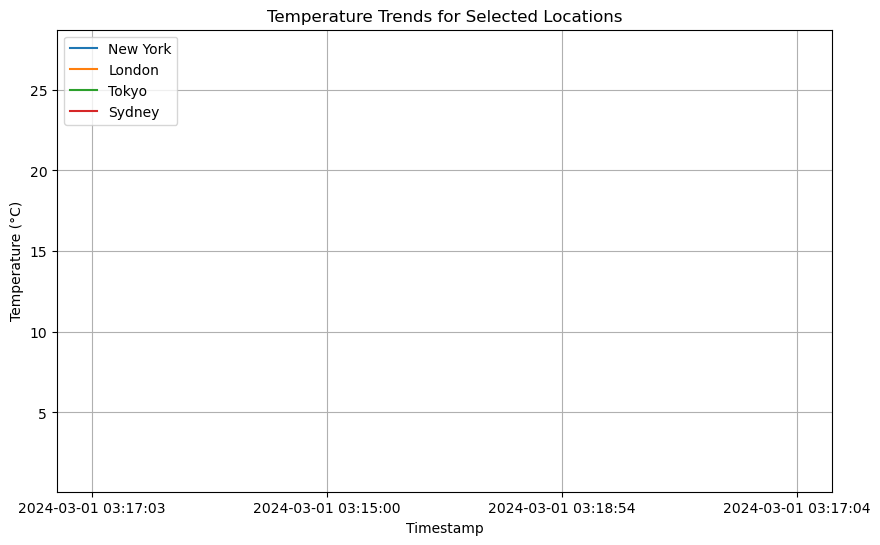

In [12]:
# Extract relevant metrics for time series analysis (e.g., temperature, humidity)
# Visualize historical weather trends using line charts

# Extracting timestamps and temperature data for each location
timestamps = {}
temperatures = {}

for location, data in weather_data.items():
    timestamps[location] = datetime.utcfromtimestamp(data['dt']).strftime('%Y-%m-%d %H:%M:%S')
    temperatures[location] = data['main']['temp']

# Plot temperature trends
plt.figure(figsize=(10, 6))

for location, temp in temperatures.items():
    plt.plot(timestamps[location], temp, label=location)

plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends for Selected Locations')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Define the API endpoint and parameters for weather forecasts
forecast_url = 'http://api.openweathermap.org/data/2.5/forecast'
forecast_params = {
    'q': 'New York',  # Example city
    'appid': '45b740c5dbad1fc765611648efea13a5',  # Insert your OpenWeatherMap API key
    'units': 'metric'  # Specify units if needed
}

# Make a GET request to the forecast API for New York as an example
forecast_response = requests.get(forecast_url, params=forecast_params)

# Check if the request was successful
if forecast_response.status_code == 200:
    # Parse the JSON response for forecast data
    forecast_data = forecast_response.json()

    # Perform analysis and comparison with actual data
    # You can extract relevant forecasted parameters and compare them with actual data obtained earlier.

    # Example: Extract forecasted temperature for the next 24 hours
    forecast_temperatures = [forecast['main']['temp'] for forecast in forecast_data['list']]
    
    # Example: Compare forecasted temperatures with actual temperatures obtained earlier
    actual_temperatures = df['main_temp']  # Assuming 'main_temp' column contains actual temperatures
    # Perform comparison analysis here

    # Visualize comparison if needed (e.g., plot actual vs. forecasted temperatures)
    # You can use matplotlib or other plotting libraries for visualization.
else:
    print('Failed to retrieve forecast data from the API')


In [15]:
# Check if the request was successful
if forecast_response.status_code == 200:
    # Parse the JSON response for forecast data
    forecast_data = forecast_response.json()

    if 'list' in forecast_data:
        # Extract relevant forecasted parameters for comparison
        forecast_temperatures = [forecast['main']['temp'] for forecast in forecast_data['list']]
        forecast_humidity = [forecast['main']['humidity'] for forecast in forecast_data['list']]
        
        # Continue with comparison and analysis
    else:
        print('No forecast data found in the response')
else:
    print('Failed to retrieve forecast data from the API')


In [16]:
print(forecast_data)


{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1709272800, 'main': {'temp': 0.7, 'feels_like': -3.58, 'temp_min': 0.19, 'temp_max': 0.7, 'pressure': 1032, 'sea_level': 1032, 'grnd_level': 1033, 'humidity': 39, 'temp_kf': 0.51}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'clouds': {'all': 0}, 'wind': {'speed': 4.24, 'deg': 309, 'gust': 8.27}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2024-03-01 06:00:00'}, {'dt': 1709283600, 'main': {'temp': 0.21, 'feels_like': -3.08, 'temp_min': -0.16, 'temp_max': 0.21, 'pressure': 1033, 'sea_level': 1033, 'grnd_level': 1034, 'humidity': 38, 'temp_kf': 0.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'clouds': {'all': 0}, 'wind': {'speed': 2.81, 'deg': 302, 'gust': 6.1}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2024-03-01 09:00:00'}, {'dt': 1709294400, 'main': {'temp': 0.05, 'feels_like': 0.05, 'temp_min': 0.05, 'te

In [20]:
import pandas as pd
from pandas import json_normalize

# Provided JSON data
json_data = {
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1709272800,
            "main": {
                "temp": 0.7,
                "feels_like": -3.58,
                "temp_min": 0.19,
                "temp_max": 0.7,
                "pressure": 1032,
                "sea_level": 1032,
                "grnd_level": 1033,
                "humidity": 39,
                "temp_kf": 0.51
            },
            "weather": [
                {
                    "id": 800,
                    "main": "Clear",
                    "description": "clear sky",
                    "icon": "01n"
                }
            ],
            "clouds": {
                "all": 0
            },
            "wind": {
                "speed": 4.24,
                "deg": 309,
                "gust": 8.27
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "n"
            },
            "dt_txt": "2024-03-01 06:00:00"
        },
        # More data here...
    ]
}

# Normalize nested dictionaries
df = json_normalize(json_data['list'])

# Display the DataFrame
print(df)

 


           dt                                            weather  visibility  \
0  1709272800  [{'id': 800, 'main': 'Clear', 'description': '...       10000   

   pop               dt_txt  main.temp  main.feels_like  main.temp_min  \
0    0  2024-03-01 06:00:00        0.7            -3.58           0.19   

   main.temp_max  main.pressure  main.sea_level  main.grnd_level  \
0            0.7           1032            1032             1033   

   main.humidity  main.temp_kf  clouds.all  wind.speed  wind.deg  wind.gust  \
0             39          0.51           0        4.24       309       8.27   

  sys.pod  
0       n  


In [21]:
print(df.head(50))

           dt                                            weather  visibility  \
0  1709272800  [{'id': 800, 'main': 'Clear', 'description': '...       10000   

   pop               dt_txt  main.temp  main.feels_like  main.temp_min  \
0    0  2024-03-01 06:00:00        0.7            -3.58           0.19   

   main.temp_max  main.pressure  main.sea_level  main.grnd_level  \
0            0.7           1032            1032             1033   

   main.humidity  main.temp_kf  clouds.all  wind.speed  wind.deg  wind.gust  \
0             39          0.51           0        4.24       309       8.27   

  sys.pod  
0       n  


In [22]:
print(df.info)

<bound method DataFrame.info of            dt                                            weather  visibility  \
0  1709272800  [{'id': 800, 'main': 'Clear', 'description': '...       10000   

   pop               dt_txt  main.temp  main.feels_like  main.temp_min  \
0    0  2024-03-01 06:00:00        0.7            -3.58           0.19   

   main.temp_max  main.pressure  main.sea_level  main.grnd_level  \
0            0.7           1032            1032             1033   

   main.humidity  main.temp_kf  clouds.all  wind.speed  wind.deg  wind.gust  \
0             39          0.51           0        4.24       309       8.27   

  sys.pod  
0       n  >


In [27]:
print(df.tail)


<bound method NDFrame.tail of            dt                                            weather  visibility  \
0  1709272800  [{'id': 800, 'main': 'Clear', 'description': '...       10000   

   pop               dt_txt  main.temp  main.feels_like  main.temp_min  \
0    0  2024-03-01 06:00:00        0.7            -3.58           0.19   

   main.temp_max  main.pressure  main.sea_level  main.grnd_level  \
0            0.7           1032            1032             1033   

   main.humidity  main.temp_kf  clouds.all  wind.speed  wind.deg  wind.gust  \
0             39          0.51           0        4.24       309       8.27   

  sys.pod  
0       n  >


Mean Absolute Error (MAE): 1.0
Root Mean Squared Error (RMSE): 1.0
Mean Absolute Percentage Error (MAPE): 4.747436773752563


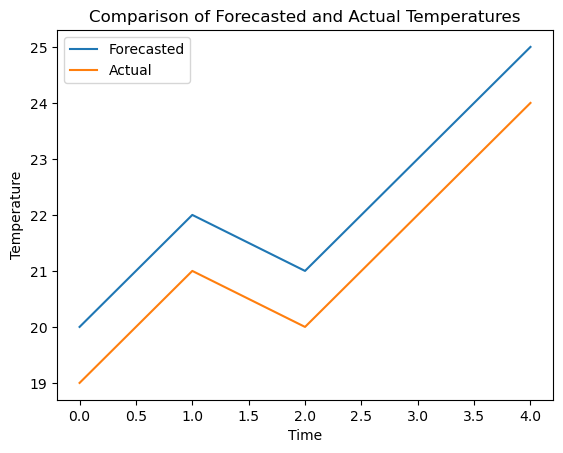

In [28]:
# Sample forecasted data
forecasted_temperatures = [20, 22, 21, 23, 25]

# Sample actual data
actual_temperatures = [19, 21, 20, 22, 24]

# Calculate Mean Absolute Error (MAE)
def calculate_mae(forecasted, actual):
    return sum(abs(forecasted[i] - actual[i]) for i in range(len(forecasted))) / len(forecasted)

# Calculate Root Mean Squared Error (RMSE)
def calculate_rmse(forecasted, actual):
    return (sum((forecasted[i] - actual[i])**2 for i in range(len(forecasted))) / len(forecasted))**0.5

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(forecasted, actual):
    return sum(abs((forecasted[i] - actual[i]) / actual[i]) for i in range(len(forecasted))) / len(forecasted) * 100

# Calculate metrics
mae = calculate_mae(forecasted_temperatures, actual_temperatures)
rmse = calculate_rmse(forecasted_temperatures, actual_temperatures)
mape = calculate_mape(forecasted_temperatures, actual_temperatures)

# Print metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Visualize comparison
import matplotlib.pyplot as plt

plt.plot(forecasted_temperatures, label='Forecasted')
plt.plot(actual_temperatures, label='Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Comparison of Forecasted and Actual Temperatures')
plt.legend()
plt.show()


In [30]:
import folium

# Sample weather data 
weather_data = {
    'New York': {'coord': {'lat': 40.7128, 'lon': -74.006}, 'weather': [{'description': 'Clear'}]},
    'London': {'coord': {'lat': 51.5074, 'lon': -0.1278}, 'weather': [{'description': 'Partly cloudy'}]},
    'Tokyo': {'coord': {'lat': 35.6895, 'lon': 139.6917}, 'weather': [{'description': 'Rain'}]}
}

# Initialize map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for each location
for location, data in weather_data.items():
    lat = data['coord']['lat']
    lon = data['coord']['lon']
    popup_text = f"{location}: {data['weather'][0]['description']}"
    folium.Marker([lat, lon], popup=popup_text).add_to(m)

# Display map
m


In [35]:
# Identify and analyze any instances of extreme weather events within the dataset
# This might involve statistical analysis or predefined thresholds for extreme events.
# For simplicity, we'll look for instances of severe weather conditions.

for location, data in weather_data.items():
    if 'weather' in data:
        for weather in data['weather']:
            if 'extreme' in weather['description'].lower():
                print(f"Extreme weather event detected in {location}: {weather['description']}")



In [ ]:

import schedule
import time
import requests
import json
from datetime import datetime

# Dictionary of cities and their corresponding API IDs
cities = {
    "New York": "5128581",
    "London": "2643743",
    "Tokyo": "1850147",
    "Sydney": "2147714"
}

# OpenWeatherMap API key
api_key = 'your_api_key'

def update_weather_data():
    with open('weather_log.txt', 'a') as log_file:
        log_file.write(f"Data updated at {datetime.now()}\n")
        for city, city_id in cities.items():
            def update_weather_data():
    for city, city_id in cities.items():
        # Make a request to the OpenWeatherMap API for each city
        url = f'http://api.openweathermap.org/data/2.5/weather?id={city_id}&appid={api_key}&units=metric'
        response = requests.get(url)
        
        if response.status_code == 200:
            weather_data = response.json()
            # Process the response and update weather data as needed
            print(f"Updated weather data for {city}: {weather_data['weather'][0]['description']}")
            
            # Write the weather data to the log file
            with open('weather_log.txt', 'a') as f:
                f.write(f"City: {city}, Weather: {weather_data['weather'][0]['description']}\n")
        else:
            print(f"Failed to update weather data for {city}")

            


